# **Laboratory Project - Fuzzy Systems and Evolutionary Computing**

# Ghiotto Alessandro 513944

In this notebook I have tested the AlphaFuzzySet and the AlphaFuzzyCombination classes while implementing them. I have added the plot() method (which plots the collection of an AlphaFuzzySet) which I have founded useful for looking at the results.

In [4]:
import sys
sys.path.append("..")
from softpy.fuzzy.AlphaFuzzySet import AlphaFuzzySet, AlphaFuzzyCombination
import matplotlib.pyplot as plt
import numpy as np

# **AlphaFuzzySet**

# We do some checks, for seeing if the collection is in the correct format

In [2]:
# alpha not a number
AlphaFuzzySet({'a string':[0,1]})

TypeError: Alpha should be a float in [0,1], is <class 'str'>

In [3]:
# alpha not in [0, 1]
AlphaFuzzySet({8:[0,1]})

ValueError: Alpha should be in [0,1], is 8

In [4]:
# alpha = 0
AlphaFuzzySet({0:[0,10]})

ValueError: Alpha=0 is not allowed, the corresponding cut covers the whole real line for any fuzzy set

In [5]:
# cuts must be lists
AlphaFuzzySet({0.5: 'from 1 to 3'})

TypeError: Alpha-cut should be a list. For alpha=0.5 received <class 'str'>

In [6]:
# an interval must have at most 2 elements
AlphaFuzzySet({0.5:[0,10,15]})

TypeError: Alpha-cut should be a list of lists. For alpha=0.5 received <class 'int'>

In [7]:
# intervals must contains numbers
AlphaFuzzySet({0.5:[[3, '6']]})

TypeError: Intervals in the alpha-cut should be [a,b] with a,b floats. For alpha=0.5 received [3, '6']

In [8]:
# intervals must be ordered
AlphaFuzzySet({0.5:[6, 3]})

ValueError: Intervals in the alpha-cut should be [a,b] with a <= b. For alpha=0.5 received [6, 3]

In [2]:
# intervals don't have to overlap
AlphaFuzzySet({0.5:[[3, 6], [5, 7]]})

ValueError: The intervals in the alpha-cut should not overlap, specify better your alpha-cut. For alpha=0.5 received [[3, 6], [5, 7]]

In [3]:
# INTERVALS MUST BE NESTED
AlphaFuzzySet({ 0.1 : [0, 10], 0.5 : [[0, 5], [7.5, 10]], 1 : [6, 7]})

ValueError: The alpha-cuts should be nested, for alpha=1 the cut is not contained in the cut of alpha=0.5

# Look at the normalization effect which is internally adopted by the class

In [9]:
# single interval are converted to a list of lists.
# [a, b] -> [[a, b]]
fs = AlphaFuzzySet({ 0.1 : [0, 10]})
fs.collection

{0.1: [[0, 10]]}

In [10]:
# values are converted to a list [a, b], with a=b
# [a] -> [[a, a]]
fs = AlphaFuzzySet({1 : [0]})
fs.collection

{1: [[0, 0]]}

In [11]:
fs = AlphaFuzzySet({ 0.1 : [0, 10], 0.5 : [[0, 5], [7.5, 10]], 1 : [[0], [2, 3]]})
fs.collection

{0.1: [[0, 10]], 0.5: [[0, 5], [7.5, 10]], 1: [[0, 0], [2, 3]]}

In [12]:
# we also have that the intervals in the cuts are ordered,
# and the alpha_cuts in the dict are ordered (ASCENDING ORDER)
fs = AlphaFuzzySet({ 1 : [[2, 3], [0]], 0.5 : [[20, 30], [0, 10]]})
fs.collection

{0.5: [[0, 10], [20, 30]], 1: [[0, 0], [2, 3]]}

In [13]:
# redundant alpha-cuts are removed
# when we have two equals alpha-cuts, we keep the one with the greatest alpha
fs = AlphaFuzzySet({ 
    1   : [[0], [2, 3]],  
    0.8 : [[0], [2, 3]], 
    0.5 : [[0], [2, 3]],
    0.3 : [0, 5],
    0.1 : [0, 5]
})
fs.collection

{0.3: [[0, 5]], 1: [[0, 0], [2, 3]]}

# Plot method

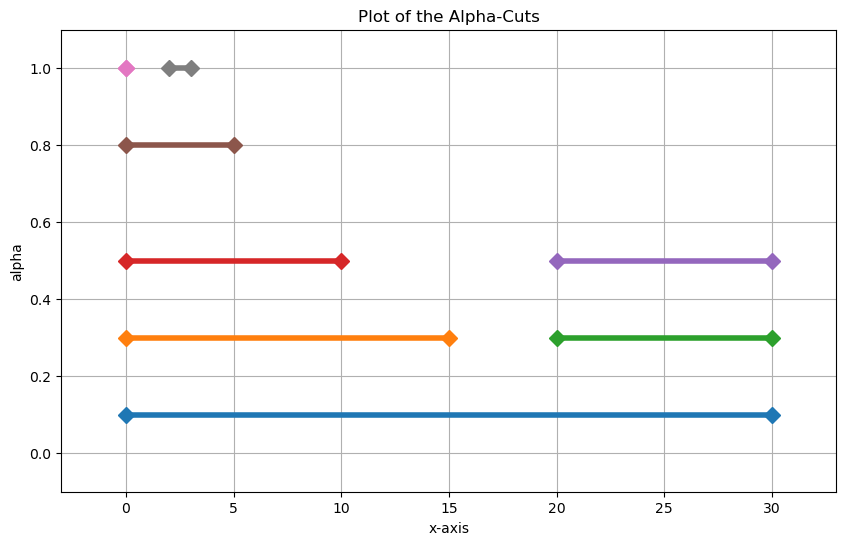

In [14]:
fs = AlphaFuzzySet({ 
    1   : [[0], [2, 3]], 
    0.8 : [[0, 5]],
    0.5 : [[0, 10], [20, 30]],
    0.3 : [[0, 15], [20, 30]],
    0.1 : [0, 30]
})
fs.plot()
plt.show()

# \_\_call\_\_

Membership degree of the value '7' to the fuzzy set 'fs':  0.5


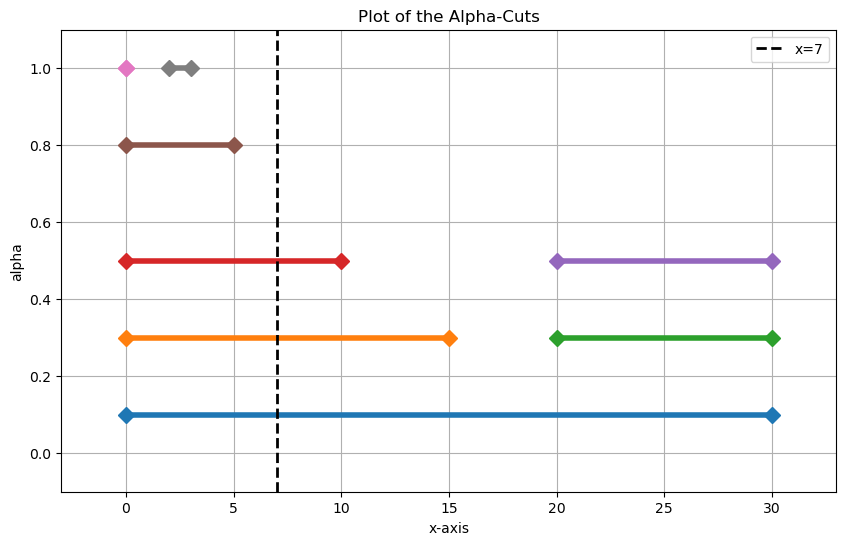

In [15]:
x = 7
print(f"Membership degree of the value '{x}' to the fuzzy set 'fs': ", fs(x))
fs.plot(vline_x=x)
plt.show()

In [17]:
out_supp = -5
in_core = 0
print(f'Outside the support of the fuzzyset: fs({out_supp}) =', fs(out_supp),
      f'\nIn the core of the fuzzyset: fs({in_core}) =', fs(in_core))

Outside the support of the fuzzyset: fs(-5) = 0.0 
In the core of the fuzzyset: fs(0) = 1


# \_\_getitem\_\_

Alpha-cut for alpha=0.4 of the fuzzy set 'fs':  [[0, 10], [20, 30]]


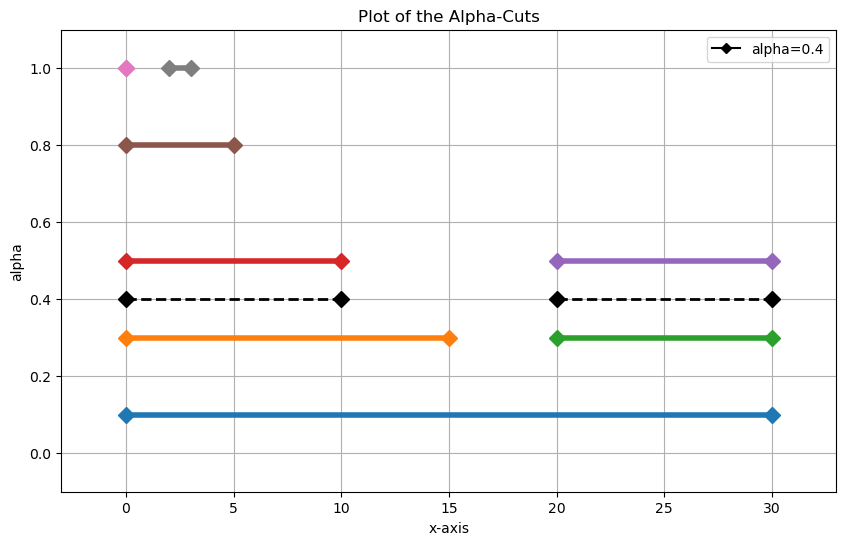

In [18]:
alpha=0.4
print(f"Alpha-cut for alpha={alpha} of the fuzzy set 'fs': ", fs[alpha])
fs.plot(hline_y=alpha)
plt.show()

In [19]:
alpha=0
print(f"Alpha-cut for alpha={alpha} of the fuzzy set 'fs': ", fs[alpha])

Alpha-cut for alpha=0 of the fuzzy set 'fs':  (-inf, inf)


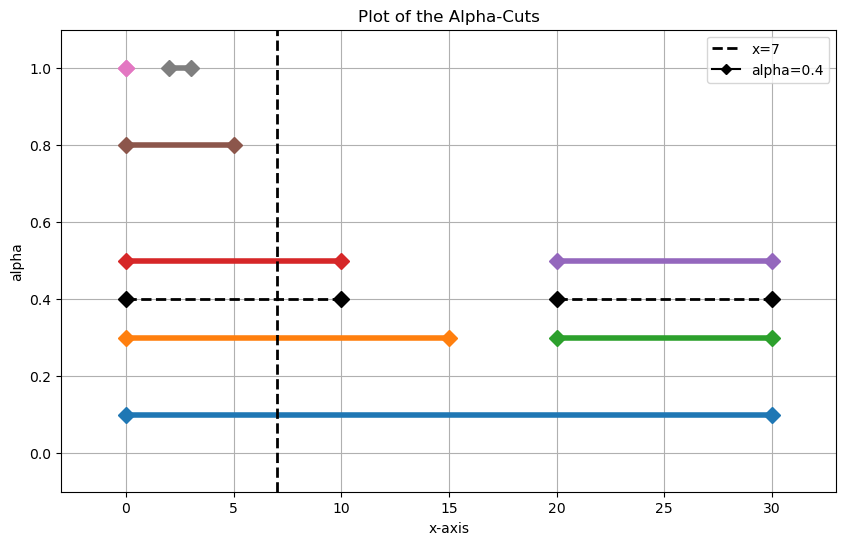

In [20]:
alpha=0.4
x=7
fs.plot(hline_y=alpha, vline_x=x)
plt.show()

# \_\_eq\_\_

fs1 == fs2:  True
fs1 == fs3:  False


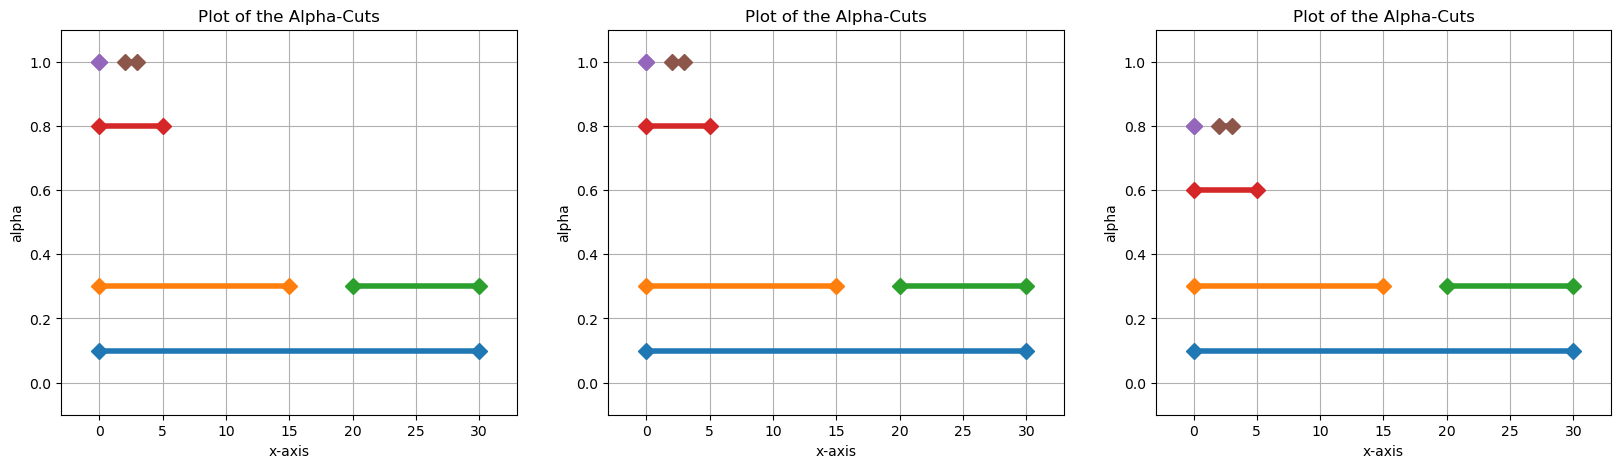

In [21]:
fs1 = AlphaFuzzySet({ 
    1   : [[0], [2, 3]], 
    0.8 : [[0, 5]],
    0.3 : [[0, 15], [20, 30]],
    0.1 : [0, 30],
    0.9 : [[2, 3], [0]], 
})

fs2 = AlphaFuzzySet({ 
    0.8 : [0, 5],
    0.3 : [[0, 15], [20, 30]],
    1   : [[0, 0], [2, 3]], 
    0.1 : [0, 30],
})

fs3 = AlphaFuzzySet({ 
    0.8   : [[0], [2, 3]], 
    0.6 : [[0, 5]],
    0.3 : [[0, 15], [20, 30]],
    0.1 : [0, 30],
})

print("fs1 == fs2: ", fs1 == fs2)
print("fs1 == fs3: ", fs1 != fs2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
ax1 = fs1.plot(ax=ax1)
ax2 = fs2.plot(ax=ax2)
ax3 = fs3.plot(ax=ax3)
plt.show()

# **AlphaFuzzyCombination**

In [22]:
fs1 = AlphaFuzzySet({ 
    1   : [[0], [2, 3]], 
    0.5 : [[0, 10], [20, 30]],
    0.1 : [0, 30]
})
fs2 = AlphaFuzzySet({ 
    1   : [13, 17], 
    0.5 : [5, 17],
    0.1 : [0, 25]
})

## min

Membership degree of the value '7' to the fuzzy set 'fs3':  0.5
Alpha-cut for alpha=0.4 of the fuzzy set 'fs3':  [[0, 17]]
min of 'fs3': 0, max of 'fs3': 25


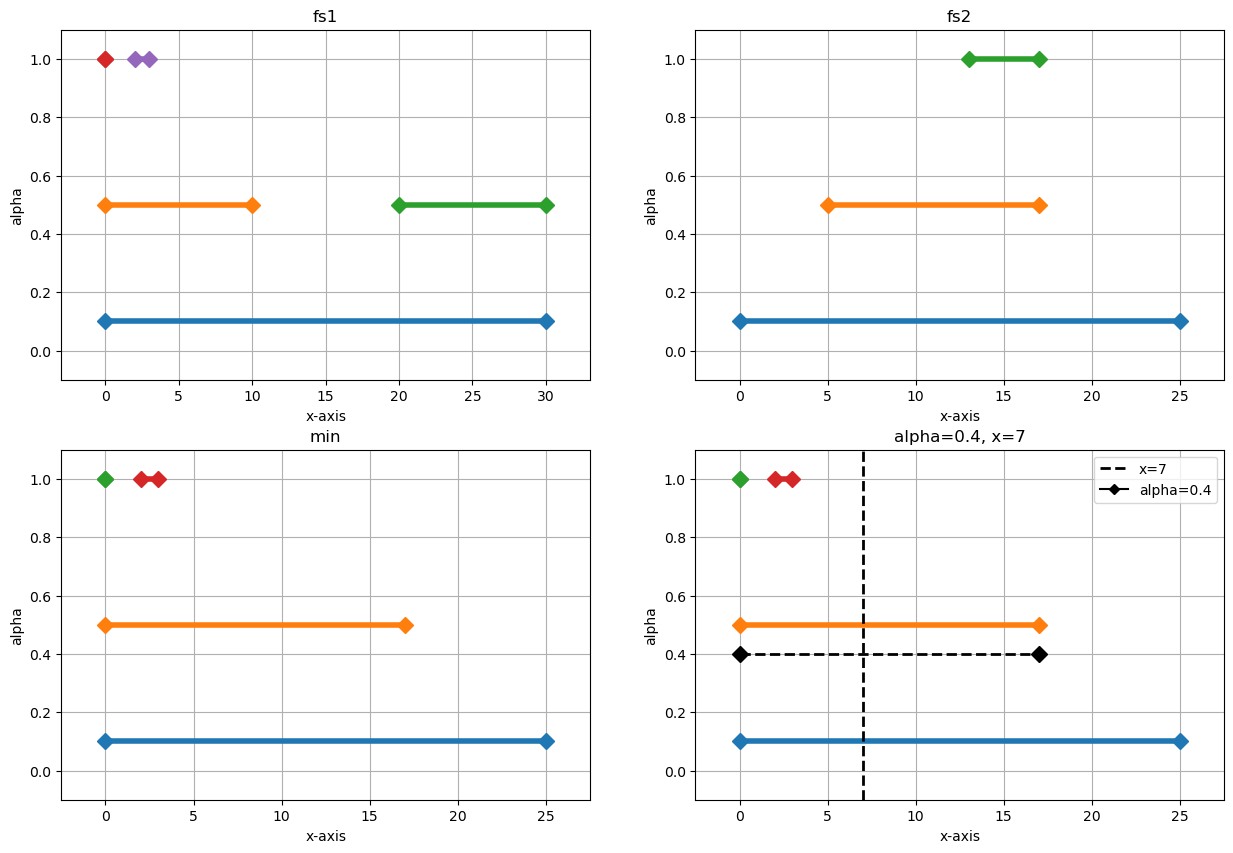

In [23]:
# min

fs3 = AlphaFuzzyCombination(fs1, fs2, np.minimum)
alpha=0.4
x=7
print(f"Membership degree of the value '{x}' to the fuzzy set 'fs3': ", fs3(x))
print(f"Alpha-cut for alpha={alpha} of the fuzzy set 'fs3': ", fs3[alpha])
print(f"min of 'fs3': {fs3.min}, max of 'fs3': {fs3.max}")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
ax1 = fs1.plot(ax=ax1, title='fs1')
ax2 = fs2.plot(ax=ax2, title='fs2')
ax3 = fs3.plot(ax=ax3, title='min')
ax4 = fs3.plot(ax=ax4, hline_y=alpha, vline_x=x, title=f'alpha={alpha}, x={x}')
plt.show()

## max

Membership degree of the value '7' to the fuzzy set 'fs3':  0.5
Alpha-cut for alpha=0.4 of the fuzzy set 'fs3':  [[5, 17], [20, 30]]
min of 'fs3': 0, max of 'fs3': 30


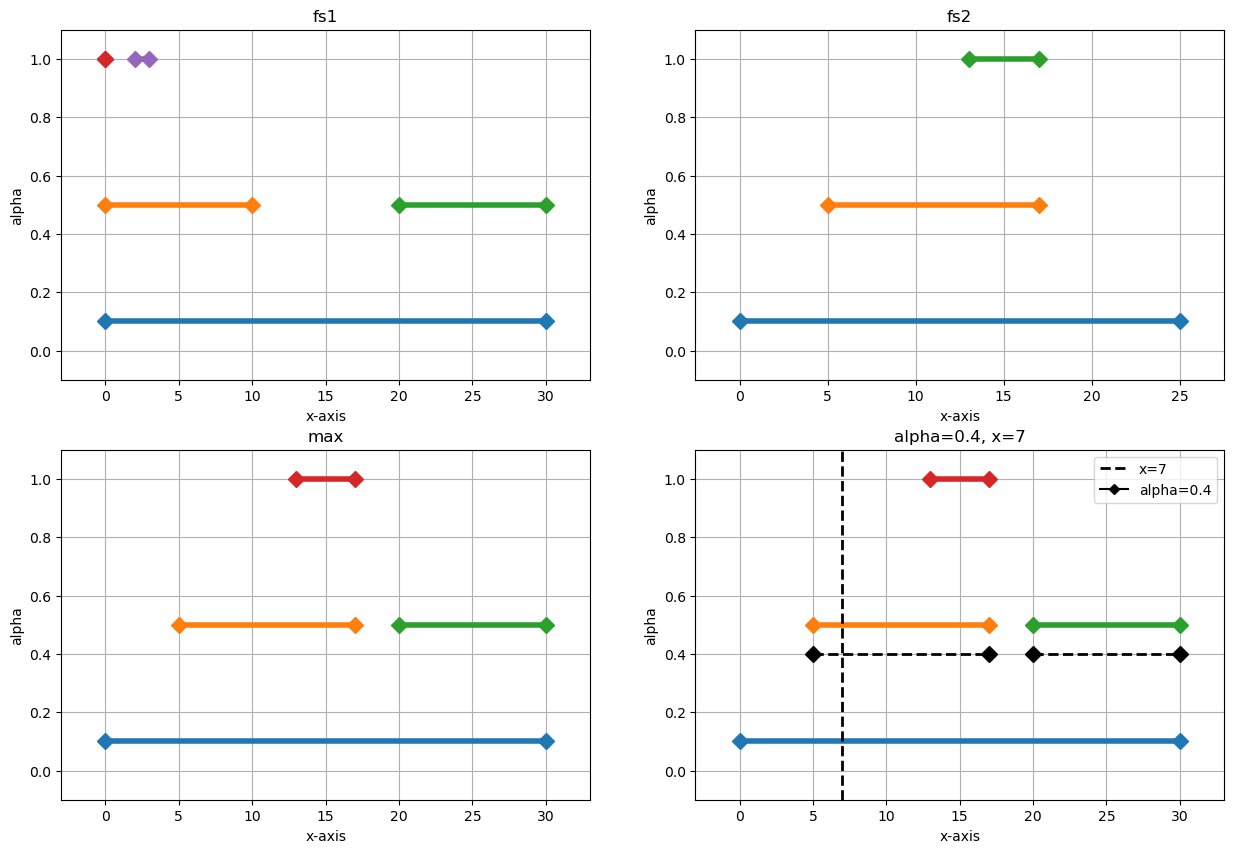

In [24]:
# max

fs3 = AlphaFuzzyCombination(fs1, fs2, np.maximum)
alpha=0.4
x=7
print(f"Membership degree of the value '{x}' to the fuzzy set 'fs3': ", fs3(x))
print(f"Alpha-cut for alpha={alpha} of the fuzzy set 'fs3': ", fs3[alpha])
print(f"min of 'fs3': {fs3.min}, max of 'fs3': {fs3.max}")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
ax1 = fs1.plot(ax=ax1, title='fs1')
ax2 = fs2.plot(ax=ax2, title='fs2')
ax3 = fs3.plot(ax=ax3, title='max')
ax4 = fs3.plot(ax=ax4, hline_y=alpha, vline_x=x, title=f'alpha={alpha}, x={x}')
plt.show()

## addition

Membership degree of the value '7' to the fuzzy set 'fs3':  0.5
Alpha-cut for alpha=0.4 of the fuzzy set 'fs3':  [[5, 47]]
min of 'fs3': 0, max of 'fs3': 55


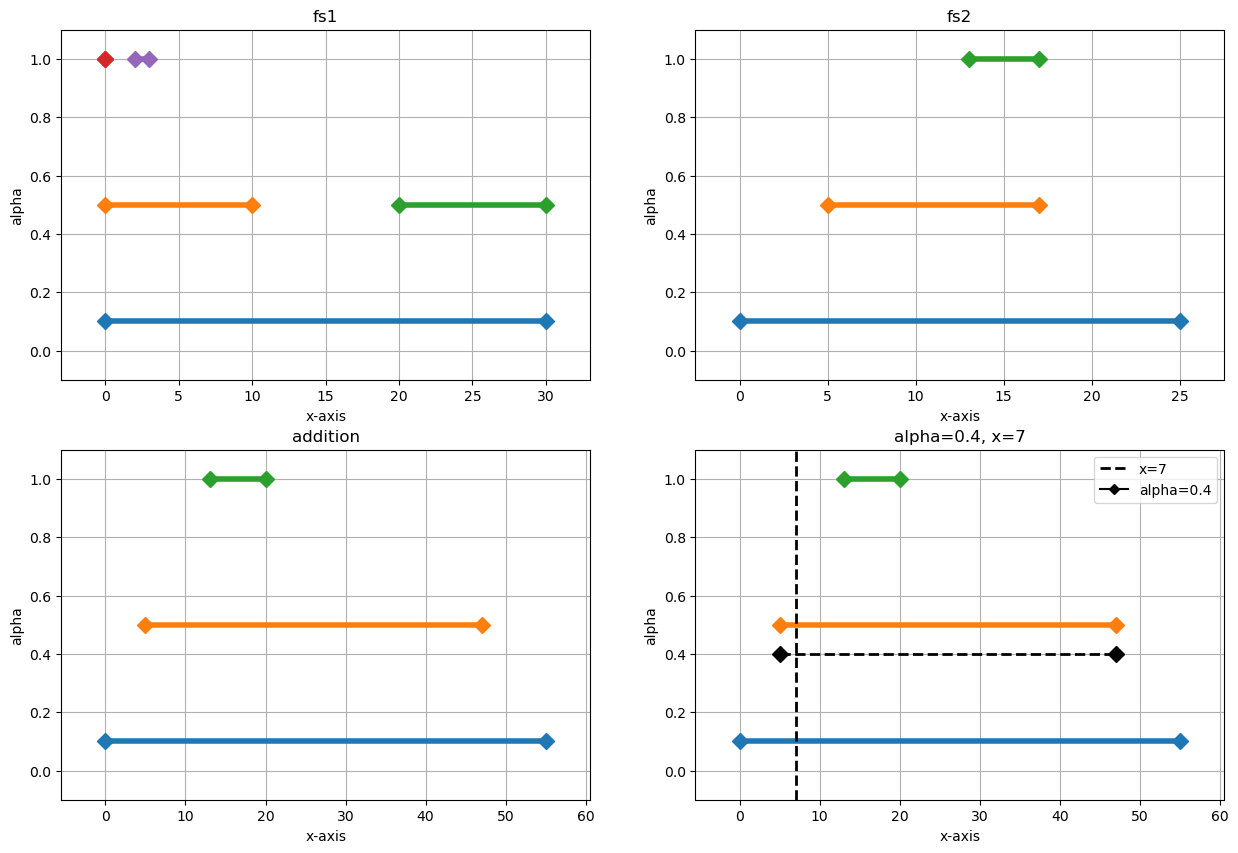

In [25]:
# addition

fs3 = AlphaFuzzyCombination(fs1, fs2, op=lambda x, y: x + y)
alpha=0.4
x=7
print(f"Membership degree of the value '{x}' to the fuzzy set 'fs3': ", fs3(x))
print(f"Alpha-cut for alpha={alpha} of the fuzzy set 'fs3': ", fs3[alpha])
print(f"min of 'fs3': {fs3.min}, max of 'fs3': {fs3.max}")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
ax1 = fs1.plot(ax=ax1, title='fs1')
ax2 = fs2.plot(ax=ax2, title='fs2')
ax3 = fs3.plot(ax=ax3, title='addition')
ax4 = fs3.plot(ax=ax4, hline_y=alpha, vline_x=x, title=f'alpha={alpha}, x={x}')
plt.show()

## multiplication

Membership degree of the value '7' to the fuzzy set 'fs3':  0.5
Alpha-cut for alpha=0.4 of the fuzzy set 'fs3':  [[0, 510]]
min of 'fs3': 0, max of 'fs3': 750


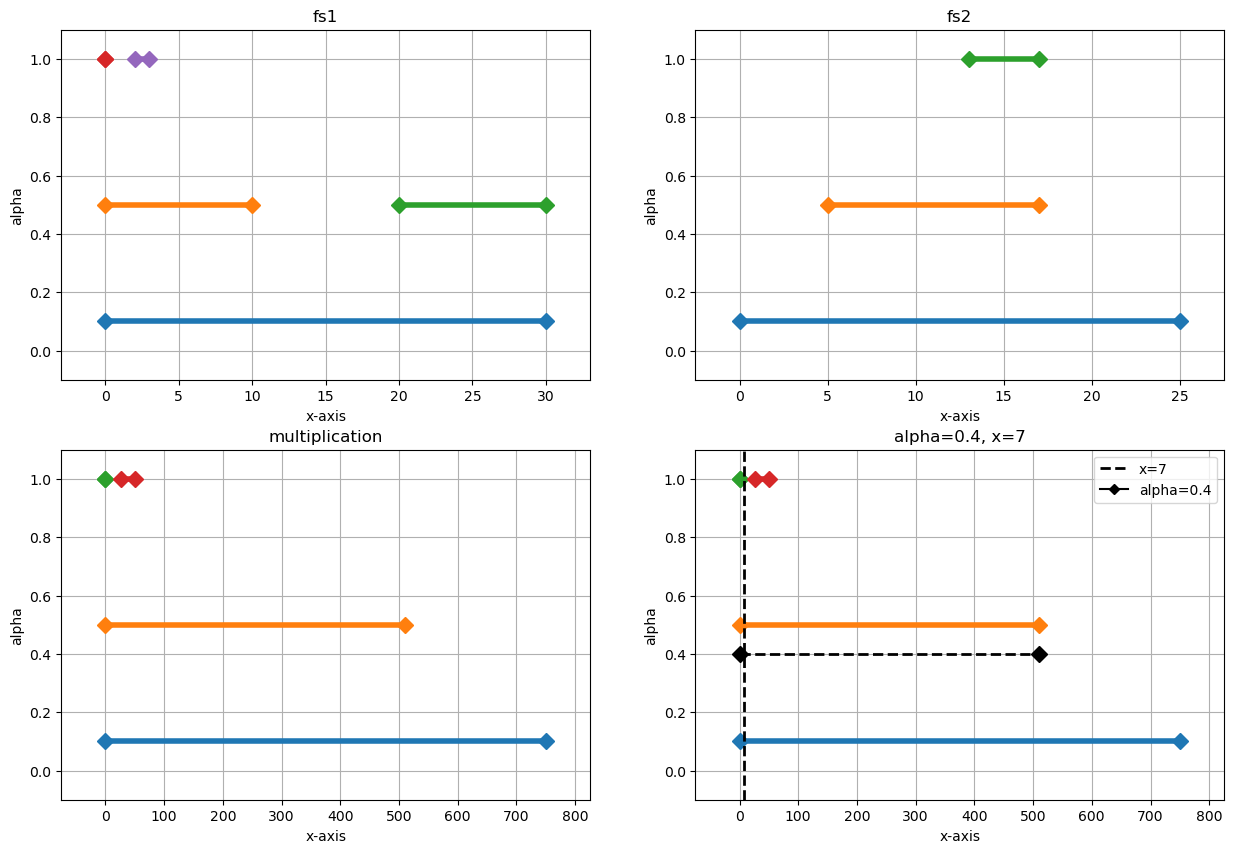

In [26]:
# multiplication

fs3 = AlphaFuzzyCombination(fs1, fs2, op=lambda x, y: x * y)
alpha=0.4
x=7
print(f"Membership degree of the value '{x}' to the fuzzy set 'fs3': ", fs3(x))
print(f"Alpha-cut for alpha={alpha} of the fuzzy set 'fs3': ", fs3[alpha])
print(f"min of 'fs3': {fs3.min}, max of 'fs3': {fs3.max}")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
ax1 = fs1.plot(ax=ax1, title='fs1')
ax2 = fs2.plot(ax=ax2, title='fs2')
ax3 = fs3.plot(ax=ax3, title='multiplication')
ax4 = fs3.plot(ax=ax4, hline_y=alpha, vline_x=x, title=f'alpha={alpha}, x={x}')
plt.show()

---

We apply the operation over the union of the set of alpha values of the two fuzzy sets (here: {0.1, 0.2, 0.5, 0.7, 1})
 
But then, after the operation is applied over all the alpha values, the alpha-cuts which are redundant are removed.

Like in the following example, we can see that the following alpha-cuts are removes:

- for the 'min' are deleted :
    - 0.7: [[0, 0], [2, 3]], since we have 1: [[0, 0], [2, 3]]
    - 0.1: [0, 20], since we have 0.2: [0, 20]
- for the 'max' is deleted:
    - 0.1: [0, 30], since we have 0.2: [0, 30]

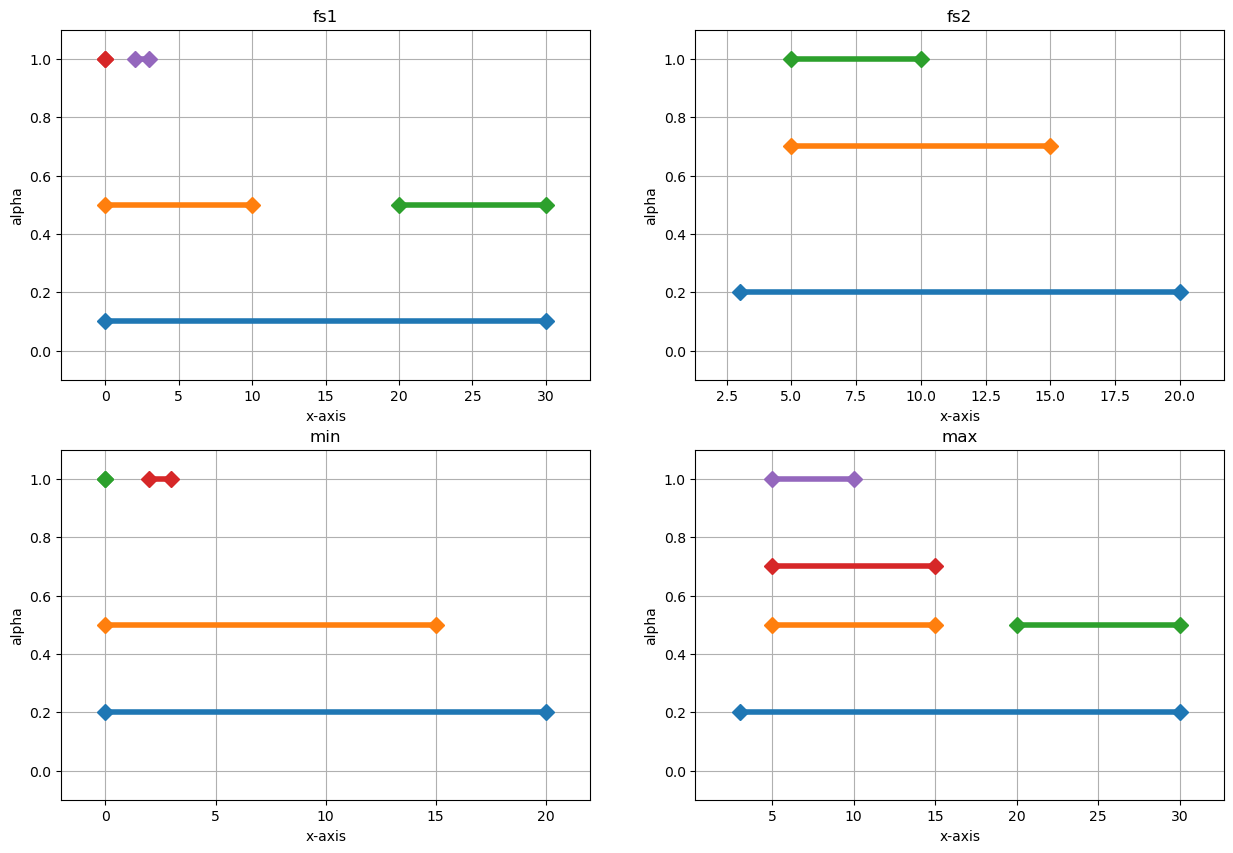

In [24]:
fs1 = AlphaFuzzySet({ 
    1   : [[0], [2, 3]], 
    0.5 : [[0, 10], [20, 30]],
    0.1 : [0, 30]
})
fs2 = AlphaFuzzySet({ 
    1   : [5, 10], 
    0.7 : [5, 15],
    0.2 : [3, 20]
})

# min
fs3 = AlphaFuzzyCombination(fs1, fs2, np.minimum)
# max
fs4 = AlphaFuzzyCombination(fs1, fs2, np.maximum)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
ax1 = fs1.plot(ax=ax1, title='fs1')
ax2 = fs2.plot(ax=ax2, title='fs2')
ax3 = fs3.plot(ax=ax3, title='min')
ax4 = fs4.plot(ax=ax4, title='max')
plt.show()